In [1]:
import pandas as pd
import glob
import os


covid = pd.read_csv("covid.csv")

In [2]:
covid.head(2)

,COV_ID,COV_REG,COV_EW,COV_EWG,COV_EY,COV_GDR,COV_AGR,COV_HSP,COV_DTH
0,1,2,8,0,22,1,1,9,9
1,2,2,28,0,22,2,4,9,9


In [3]:
categorical_cols = [
    "COV_REG", "COV_EW", "COV_EWG", "COV_EY",
    "COV_GDR", "COV_AGR", "COV_HSP", "COV_DTH"
]

for col in categorical_cols:
    covid[col] = covid[col].astype("category")

C:\Users\samkl\AppData\Local\Temp\ipykernel_30316\4041558079.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  covid.groupby("COV_AGR")["COV_DTH"]


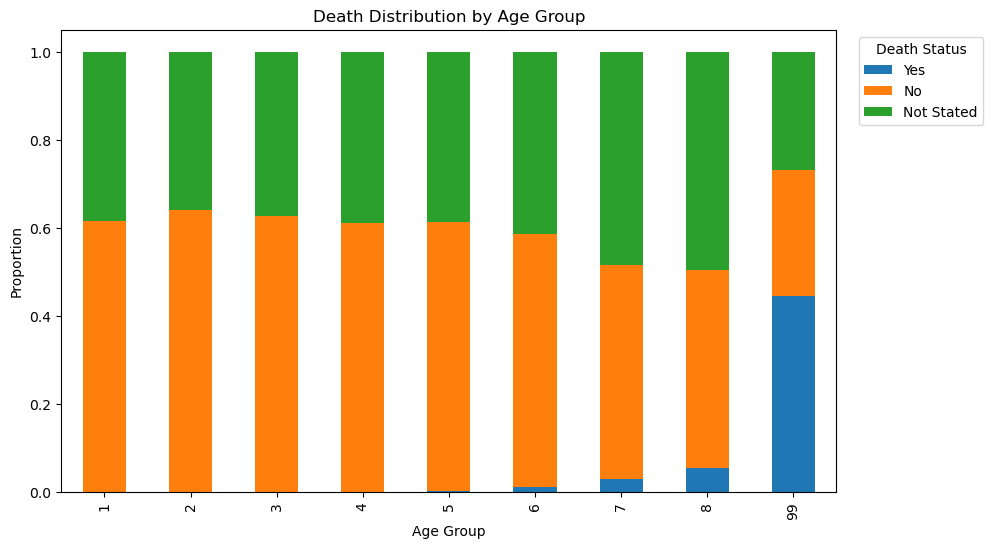

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure column is categorical
covid["COV_DTH"] = covid["COV_DTH"].astype("category")

# Rename categories
covid["COV_DTH"] = covid["COV_DTH"].cat.rename_categories({
    1: "Yes",
    2: "No",
    9: "Not Stated"
})

# REBUILD the grouped dataframe
death_by_age = (
    covid.groupby("COV_AGR")["COV_DTH"]
    .value_counts(normalize=True)
    .unstack()
)

# Plot
death_by_age.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Death Distribution by Age Group")
plt.ylabel("Proportion")
plt.xlabel("Age Group")

plt.legend(
    title="Death Status",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

C:\Users\samkl\AppData\Local\Temp\ipykernel_30316\4264649144.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["COV_EY", "Week of Year"])


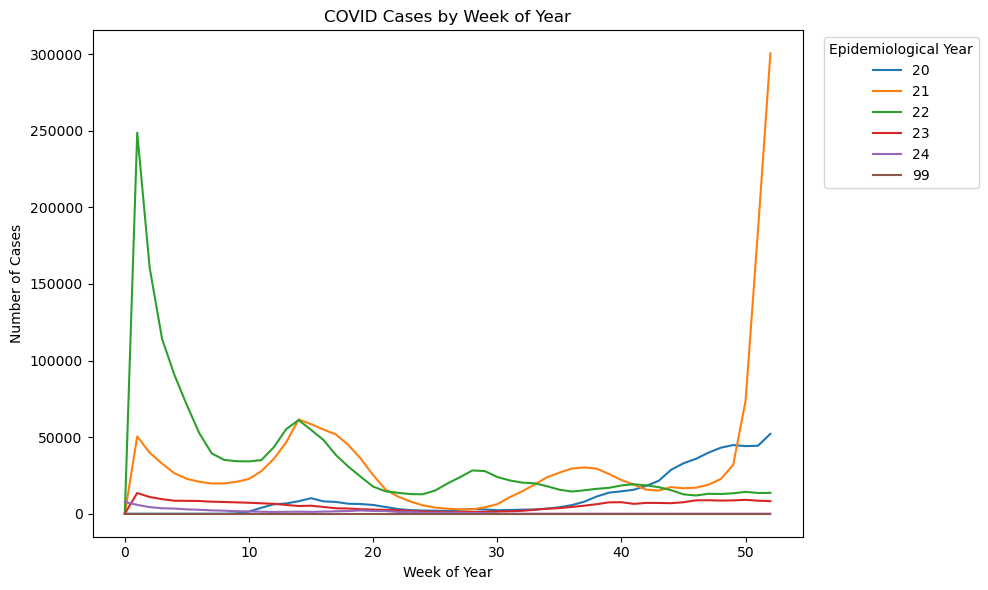

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rename column
covid = covid.rename(columns={"COV_EW": "Week of Year"})

# Ensure numeric
covid["Week of Year"] = pd.to_numeric(covid["Week of Year"], errors="coerce")

# Build weekly cases dataframe
weekly_cases = (
    covid_clean
    .groupby(["COV_EY", "Week of Year"])
    .size()
    .reset_index(name="cases")
    .sort_values(["COV_EY", "Week of Year"])
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=weekly_cases,
    x="Week of Year",
    y="cases",
    hue="COV_EY"
)

plt.title("COVID Cases by Week of Year")
plt.xlabel("Week of Year")
plt.ylabel("Number of Cases")

plt.legend(title="Year", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

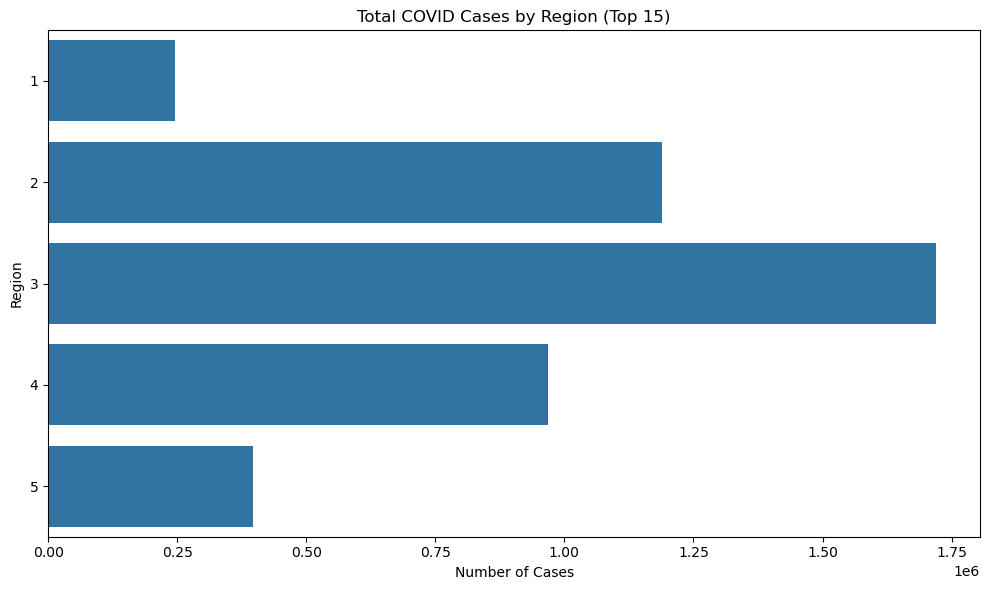

C:\Users\samkl\AppData\Local\Temp\ipykernel_30316\3065922553.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["COV_EY", "COV_REG"])


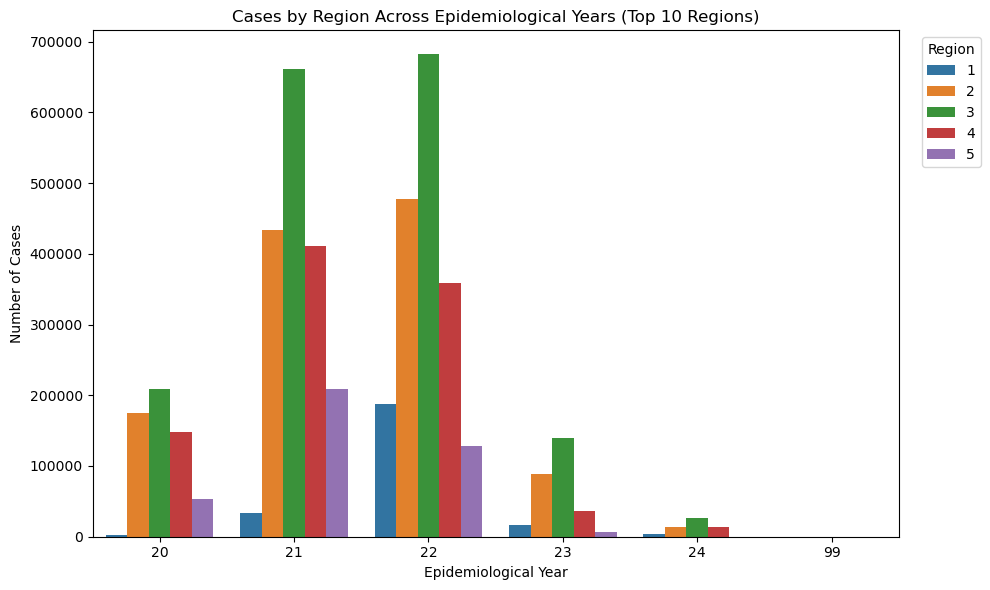

C:\Users\samkl\AppData\Local\Temp\ipykernel_30316\3065922553.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["COV_REG", "Week of Year"])


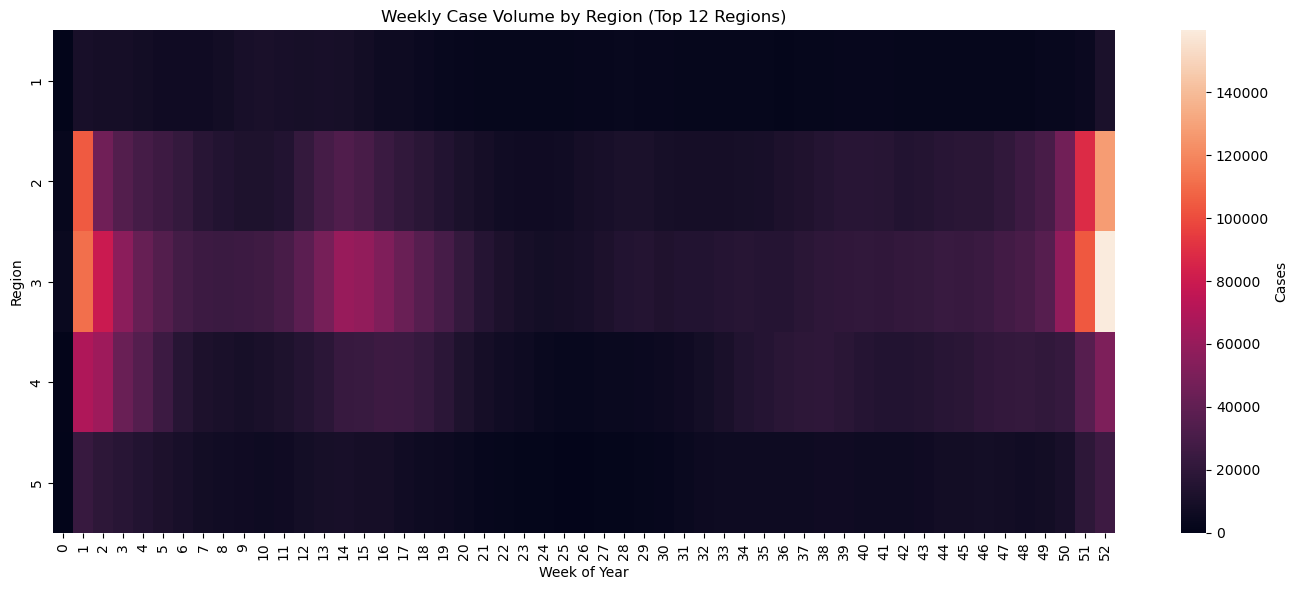

C:\Users\samkl\AppData\Local\Temp\ipykernel_30316\3065922553.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dth_df.groupby("COV_REG")["COV_DTH"]


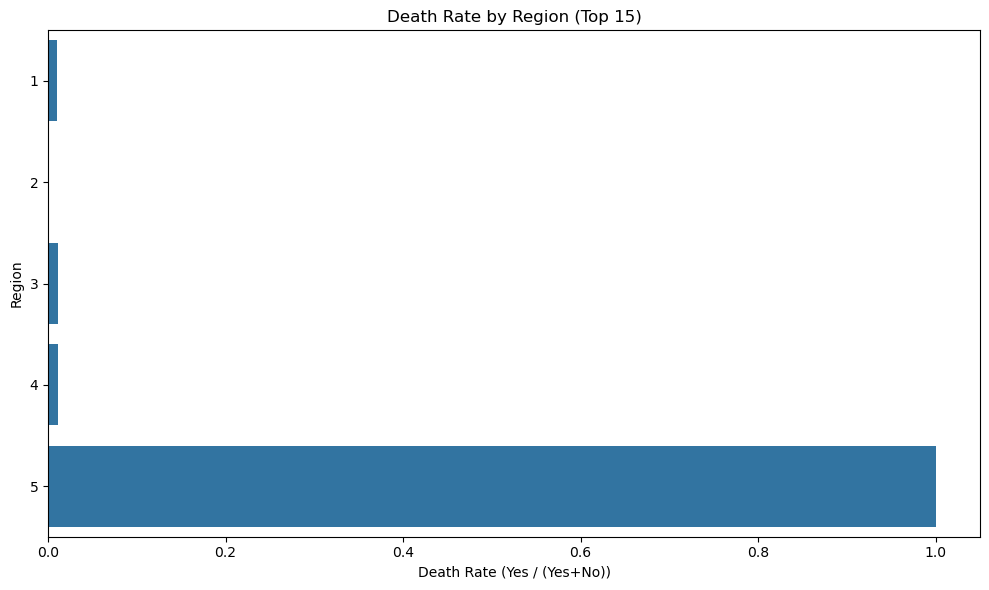

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Prep ---
covid = covid.rename(columns={"COV_EW": "Week of Year"})
covid["Week of Year"] = pd.to_numeric(covid["Week of Year"], errors="coerce")

# Remove week 99 (Not Stated) for time-based visuals
covid_clean = covid[covid["Week of Year"] != 99].copy()

# Ensure region is treated consistently
covid_clean["COV_REG"] = covid_clean["COV_REG"].astype("category")

# =========================
# 1) Total cases by Region (Top 15)
# =========================
region_counts = covid_clean["COV_REG"].value_counts().head(15).reset_index()
region_counts.columns = ["COV_REG", "cases"]

plt.figure(figsize=(10,6))
sns.barplot(data=region_counts, x="cases", y="COV_REG")
plt.title("Total COVID Cases by Region (Top 15)")
plt.xlabel("Number of Cases")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# =========================
# 2) Cases by Region and Year (Top 10 regions overall)
# =========================
top_regions = covid_clean["COV_REG"].value_counts().head(10).index
region_year = (
    covid_clean[covid_clean["COV_REG"].isin(top_regions)]
    .groupby(["COV_EY", "COV_REG"])
    .size()
    .reset_index(name="cases")
    .sort_values(["COV_EY", "cases"], ascending=[True, False])
)

plt.figure(figsize=(10,6))
sns.barplot(data=region_year, x="COV_EY", y="cases", hue="COV_REG")
plt.title("Cases by Region Across Epidemiological Years (Top 10 Regions)")
plt.xlabel("Epidemiological Year")
plt.ylabel("Number of Cases")
plt.legend(title="Region", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# =========================
# 3) Heatmap: Region x Week of Year (Top 12 regions)
# =========================
top_regions12 = covid_clean["COV_REG"].value_counts().head(12).index
heat_df = (
    covid_clean[covid_clean["COV_REG"].isin(top_regions12)]
    .groupby(["COV_REG", "Week of Year"])
    .size()
    .reset_index(name="cases")
)

heat_pivot = heat_df.pivot(index="COV_REG", columns="Week of Year", values="cases").fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(heat_pivot, cbar_kws={"label": "Cases"})
plt.title("Weekly Case Volume by Region (Top 12 Regions)")
plt.xlabel("Week of Year")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# =========================
# 4) Death rate by Region (filters Not Stated out)
#    Assumes you previously renamed COV_DTH categories to Yes/No/Not Stated
# =========================
if "COV_DTH" in covid_clean.columns:
    dth_df = covid_clean[covid_clean["COV_DTH"].isin(["Yes", "No"])].copy()

    death_rate_region = (
        dth_df.groupby("COV_REG")["COV_DTH"]
        .apply(lambda x: (x == "Yes").mean())
        .reset_index(name="death_rate")
    )

    death_rate_region = death_rate_region.sort_values("death_rate", ascending=False).head(15)

    plt.figure(figsize=(10,6))
    sns.barplot(data=death_rate_region, x="death_rate", y="COV_REG")
    plt.title("Death Rate by Region (Top 15)")
    plt.xlabel("Death Rate (Yes / (Yes+No))")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.show()

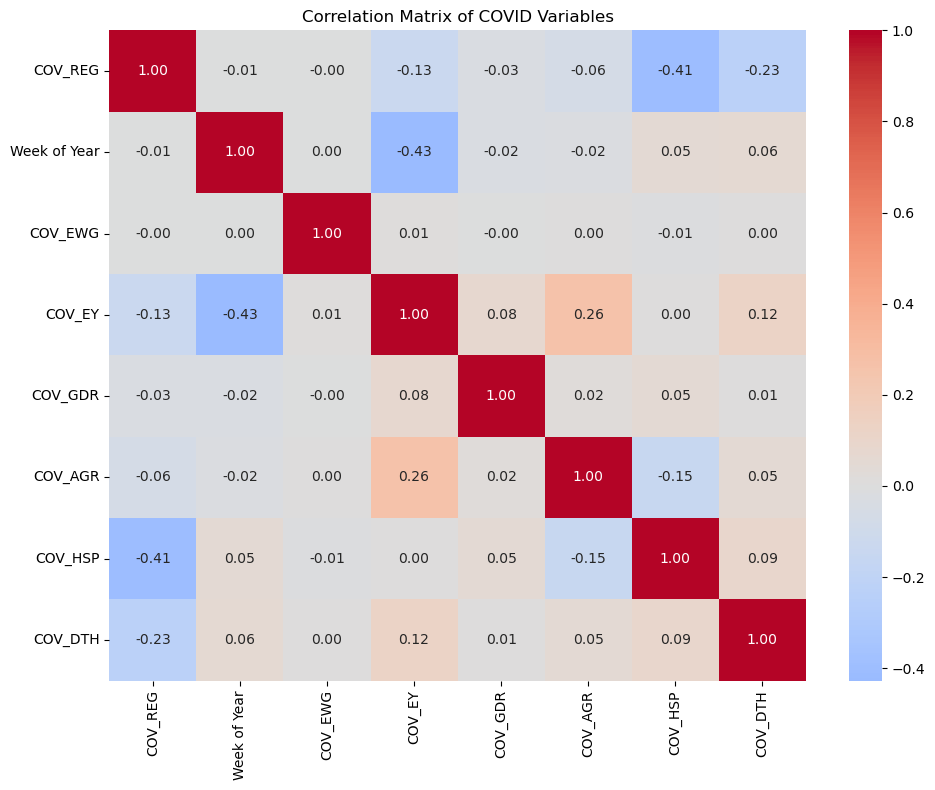

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy so we don't alter original
corr_df = covid.copy()

# Drop ID if still present
if "COV_ID" in corr_df.columns:
    corr_df = corr_df.drop(columns=["COV_ID"])

# Convert all categorical columns to numeric codes
for col in corr_df.columns:
    if corr_df[col].dtype.name == "category":
        corr_df[col] = corr_df[col].cat.codes

# If Week of Year exists and has 99 as Not Stated, remove it
if "Week of Year" in corr_df.columns:
    corr_df = corr_df[corr_df["Week of Year"] != 99]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)

plt.title("Correlation Matrix of COVID Variables")
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# -------------------------
# 1. Prepare Modeling Data
# -------------------------

# Keep only Yes/No deaths
model_df = covid[covid["COV_DTH"].isin(["Yes", "No"])].copy()

# Create binary target (1 = Yes, 0 = No)
model_df["Death_Binary"] = (model_df["COV_DTH"] == "Yes").astype(int)

# Drop original death column
X = model_df.drop(columns=["COV_DTH", "Death_Binary", "COV_ID"], errors="ignore")
y = model_df["Death_Binary"]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# -------------------------
# 2. Train/Test Split
# -------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -------------------------
# 3. Logistic Regression (balanced)
# -------------------------

log_model = LogisticRegression(max_iter=2000, class_weight="balanced")
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

# -------------------------
# 4. Evaluation
# -------------------------

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))

Confusion Matrix:

[[481731  56232]
 [   431   7230]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.90      0.94    537963
           1       0.11      0.94      0.20      7661

    accuracy                           0.90    545624
   macro avg       0.56      0.92      0.57    545624
weighted avg       0.99      0.90      0.93    545624


ROC-AUC Score:
0.9752460704328705


Confusion Matrix:

[[495230  42733]
 [   880   6781]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    537963
           1       0.14      0.89      0.24      7661

    accuracy                           0.92    545624
   macro avg       0.57      0.90      0.60    545624
weighted avg       0.99      0.92      0.95    545624


ROC-AUC Score:
0.9540539199076612


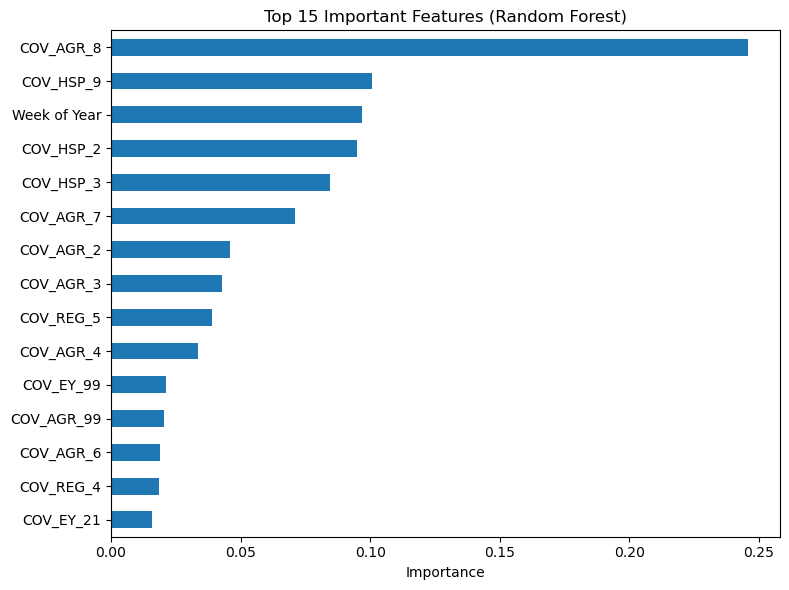

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# Train Random Forest
# -------------------------

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# -------------------------
# Evaluation
# -------------------------

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, rf_prob))

# -------------------------
# Feature Importance Plot
# -------------------------

importance = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
top_features = importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
top_features.sort_values().plot(kind="barh")
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

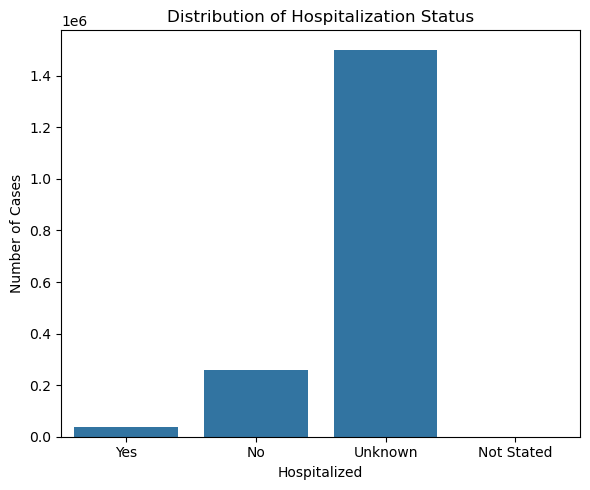

C:\Users\samkl\AppData\Local\Temp\ipykernel_30316\1034083449.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hosp_df.groupby("COV_AGR")["COV_HSP"]


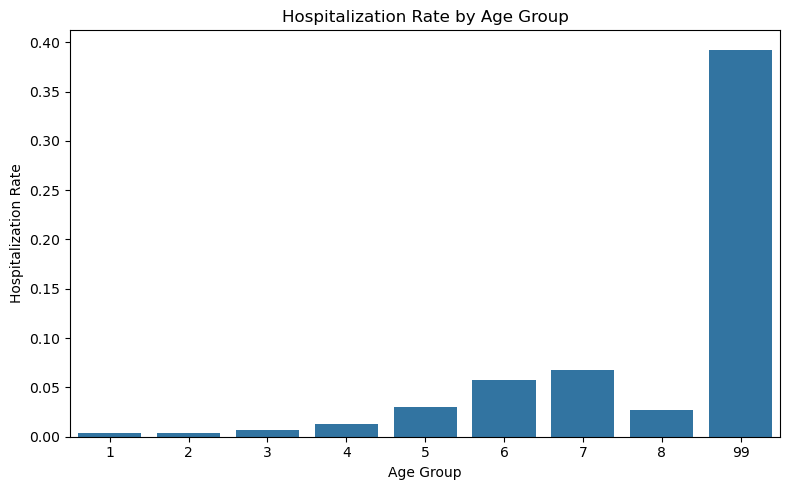

C:\Users\samkl\AppData\Local\Temp\ipykernel_30316\1034083449.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hd_df.groupby("COV_HSP")["COV_DTH"]


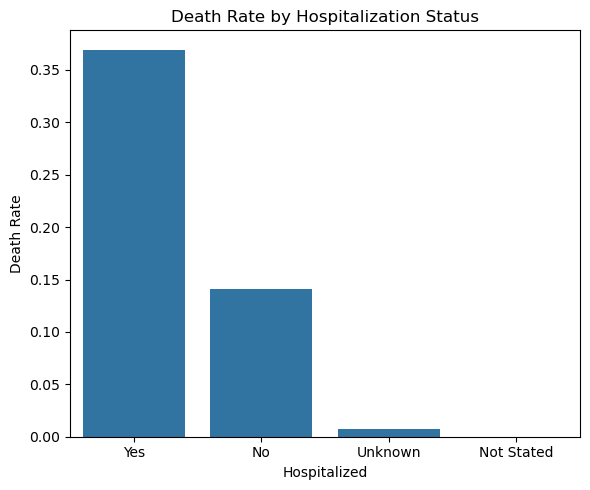

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Rename Hospital Categories ---
# Adjust numbers if your coding differs
covid["COV_HSP"] = covid["COV_HSP"].astype("category")

covid["COV_HSP"] = covid["COV_HSP"].cat.rename_categories({
    1: "Yes",
    2: "No",
    3: "Unknown",
    9: "Not Stated"
})

# Remove Not Stated for cleaner visuals
hosp_df = covid[covid["COV_HSP"] != "Not Stated"].copy()

# =========================
# 1) Overall Hospitalization Distribution
# =========================
plt.figure(figsize=(6,5))
sns.countplot(data=hosp_df, x="COV_HSP")
plt.title("Distribution of Hospitalization Status")
plt.xlabel("Hospitalized")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

# =========================
# 2) Hospitalization Rate by Age Group
# =========================
hosp_rate_age = (
    hosp_df.groupby("COV_AGR")["COV_HSP"]
    .apply(lambda x: (x == "Yes").mean())
    .reset_index(name="Hospitalization Rate")
)

plt.figure(figsize=(8,5))
sns.barplot(data=hosp_rate_age, x="COV_AGR", y="Hospitalization Rate")
plt.title("Hospitalization Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Hospitalization Rate")
plt.tight_layout()
plt.show()

# =========================
# 3) Hospitalization vs Death
# =========================
hd_df = hosp_df[hosp_df["COV_DTH"].isin(["Yes", "No"])]

hosp_death = (
    hd_df.groupby("COV_HSP")["COV_DTH"]
    .apply(lambda x: (x == "Yes").mean())
    .reset_index(name="Death Rate")
)

plt.figure(figsize=(6,5))
sns.barplot(data=hosp_death, x="COV_HSP", y="Death Rate")
plt.title("Death Rate by Hospitalization Status")
plt.xlabel("Hospitalized")
plt.ylabel("Death Rate")
plt.tight_layout()
plt.show()